# fig_rq7_tpch

RQ7 (TPCH incremental updates) 折线图：x 轴为 batch `0~10`，每个查询一个子图。

- 默认只看 `no_layout`
- 支持一次显示多个 metric（每个 metric 一张总图）
- 默认直接在 notebook 显示，不批量保存到 `notebooks/figures`


In [1]:
# --- Bootstrap paths so imports work both inside/outside VS Code ---
import sys
from pathlib import Path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

NB_DIR = Path.cwd()
PROJ_ROOT = NB_DIR.parent if NB_DIR.name == 'notebooks' else NB_DIR

for p in (NB_DIR, PROJ_ROOT, PROJ_ROOT / "notebooks"):
    if str(p) not in sys.path:
        sys.path.insert(0, str(p))

try:
    %load_ext autoreload
    %autoreload 2
except Exception:
    pass

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from fig_rq7_tpch import load_rq7_batch_metrics, plot_rq7_per_query_lines


In [7]:
# --- Config ---
LAYOUTS = ['no_layout','linear','zorder']
METRICS = ['bytes_scanned_ev', 'elapsedTime_s', 'executorRunTime_s', 'executorCpuTime_s']
# 也可以只看一个: METRICS = ['elapsedTime_s']
BATCHES = list(range(0, 11))


In [8]:
# --- Load & summarize (one summary table per metric) ---
summary_by_metric = {}
for metric in METRICS:
    df = load_rq7_batch_metrics(layouts=LAYOUTS, metric=metric)
    summary_by_metric[metric] = df
    print(f"[{metric}] layouts={sorted(df['layout'].unique().tolist())} specs={df['spec'].nunique()} rows={len(df)}")

display(summary_by_metric[METRICS[0]].head())


[bytes_scanned_ev] layouts=['linear', 'no_layout', 'zorder'] specs=20 rows=560
[elapsedTime_s] layouts=['linear', 'no_layout', 'zorder'] specs=20 rows=560
[executorRunTime_s] layouts=['linear', 'no_layout', 'zorder'] specs=20 rows=560
[executorCpuTime_s] layouts=['linear', 'no_layout', 'zorder'] specs=20 rows=560


,spec,query_family,layout,batch,n_runs,metric_mean,metric_median,metric_std,csv_path
0,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,RQ7_Q1,linear,0,10,197.1319,231.5785,66.661654,/Users/guanlil1/Dropbox/PostDoc/topics/lakehou...
1,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,RQ7_Q1,linear,1,10,993.0477,953.7900,118.118486,/Users/guanlil1/Dropbox/PostDoc/topics/lakehou...
2,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,RQ7_Q1,linear,2,10,1139.3083,1096.2535,222.533248,/Users/guanlil1/Dropbox/PostDoc/topics/lakehou...
3,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,RQ7_Q1,linear,3,10,1022.8254,953.5110,140.371062,/Users/guanlil1/Dropbox/PostDoc/topics/lakehou...
4,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,RQ7_Q1,linear,4,10,1062.6273,1024.0075,176.456109,/Users/guanlil1/Dropbox/PostDoc/topics/lakehou...



=== bytes_scanned_ev ===


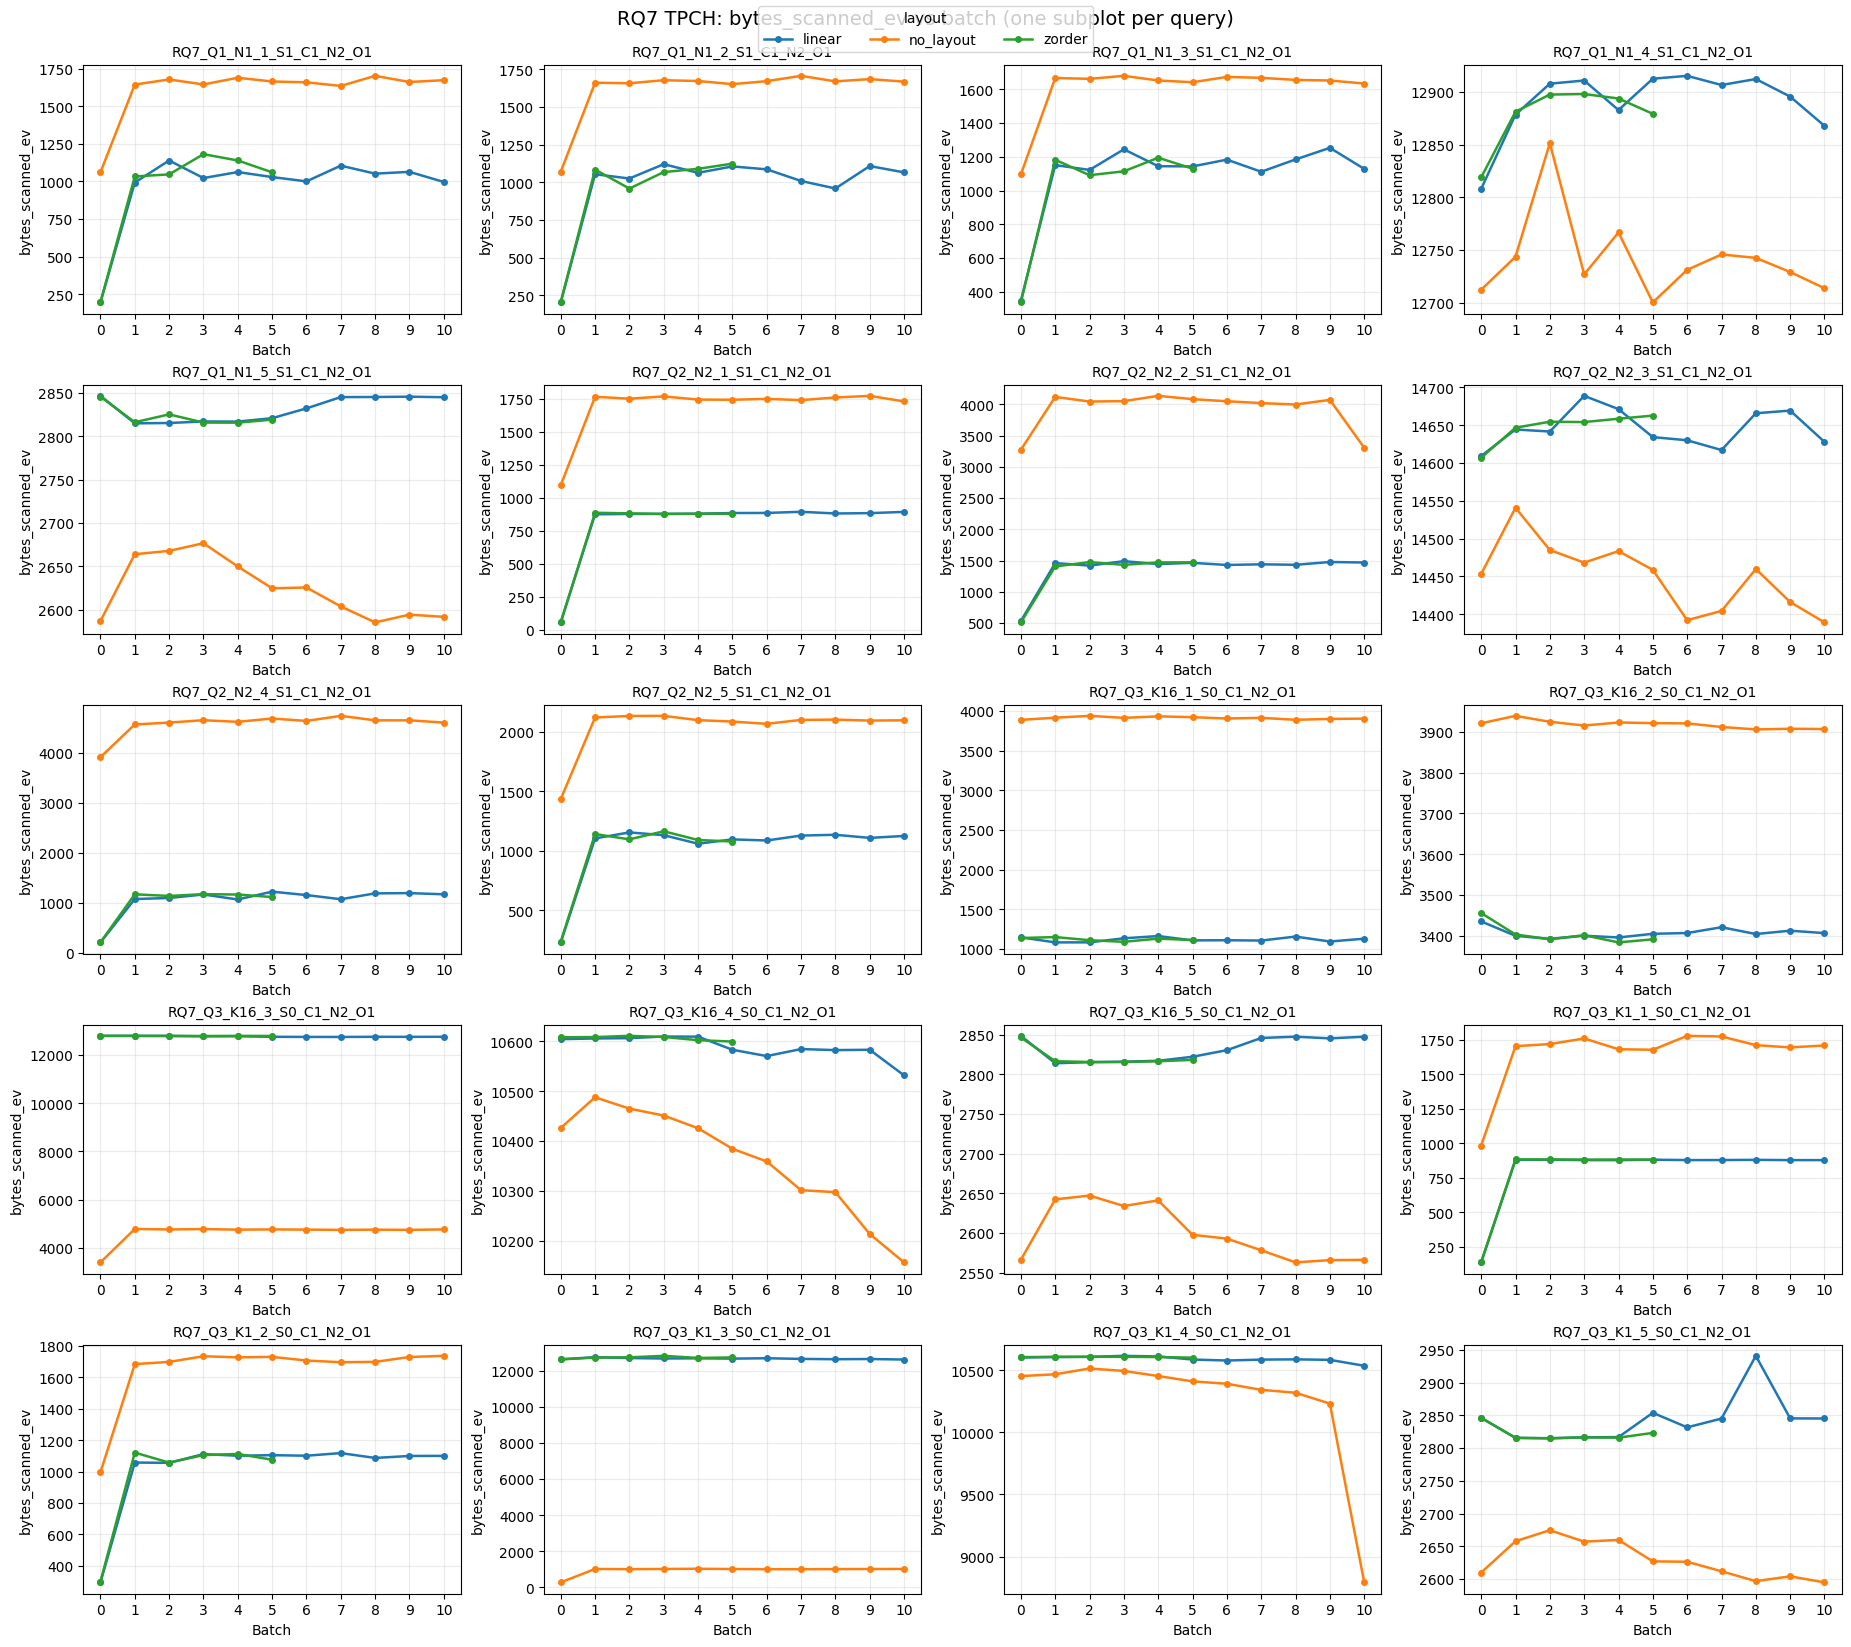


=== elapsedTime_s ===


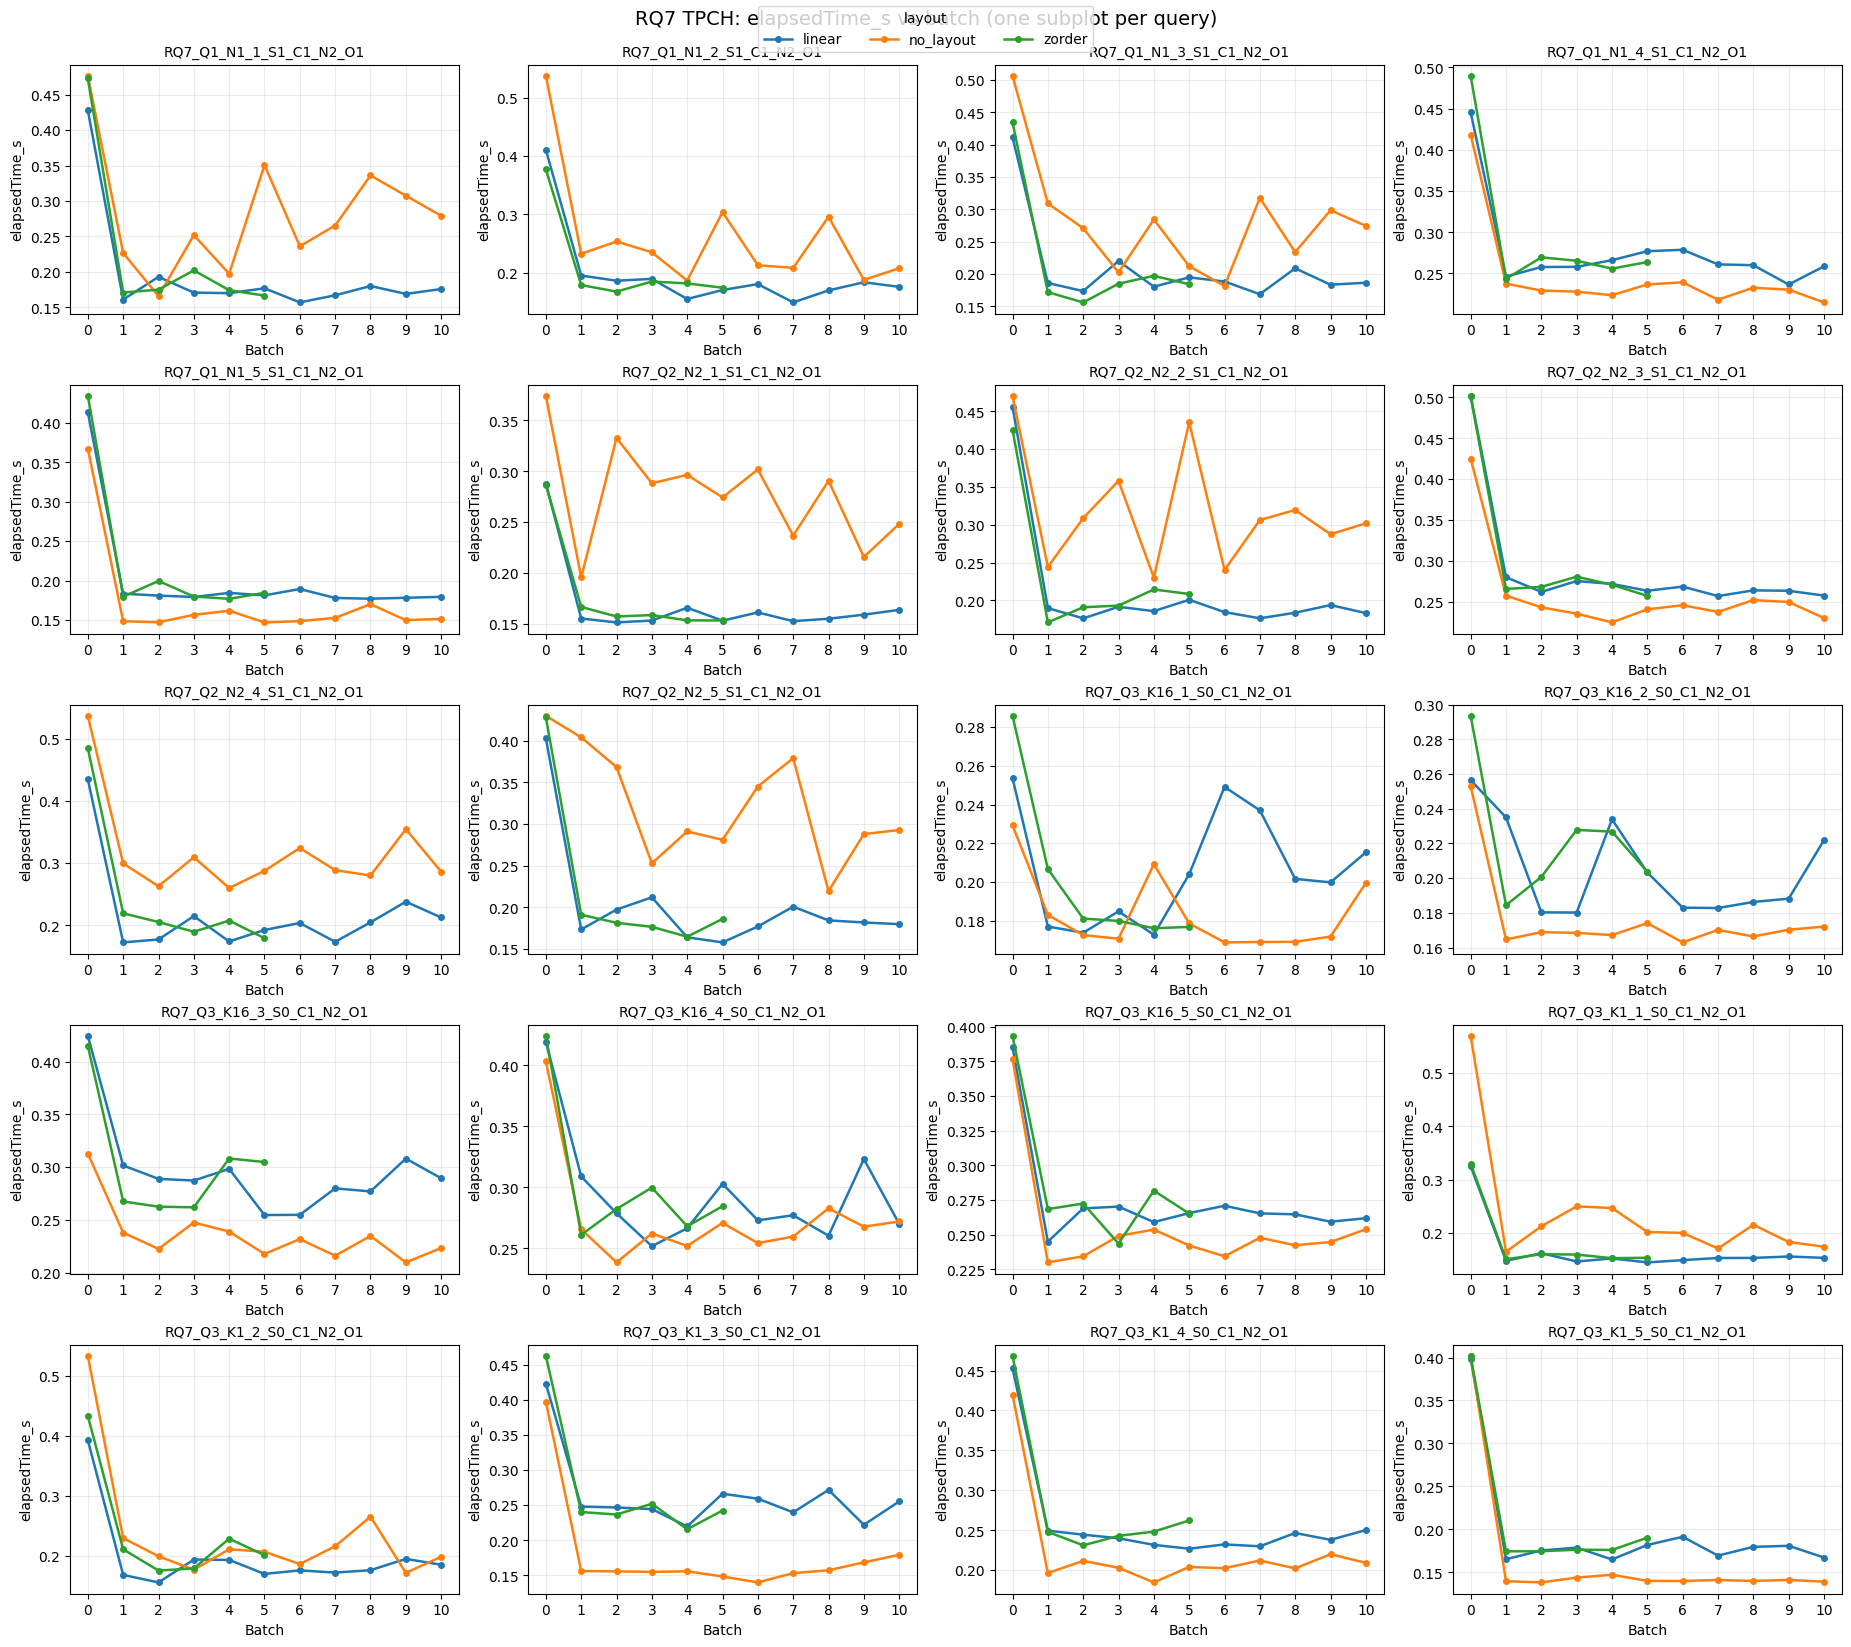


=== executorRunTime_s ===


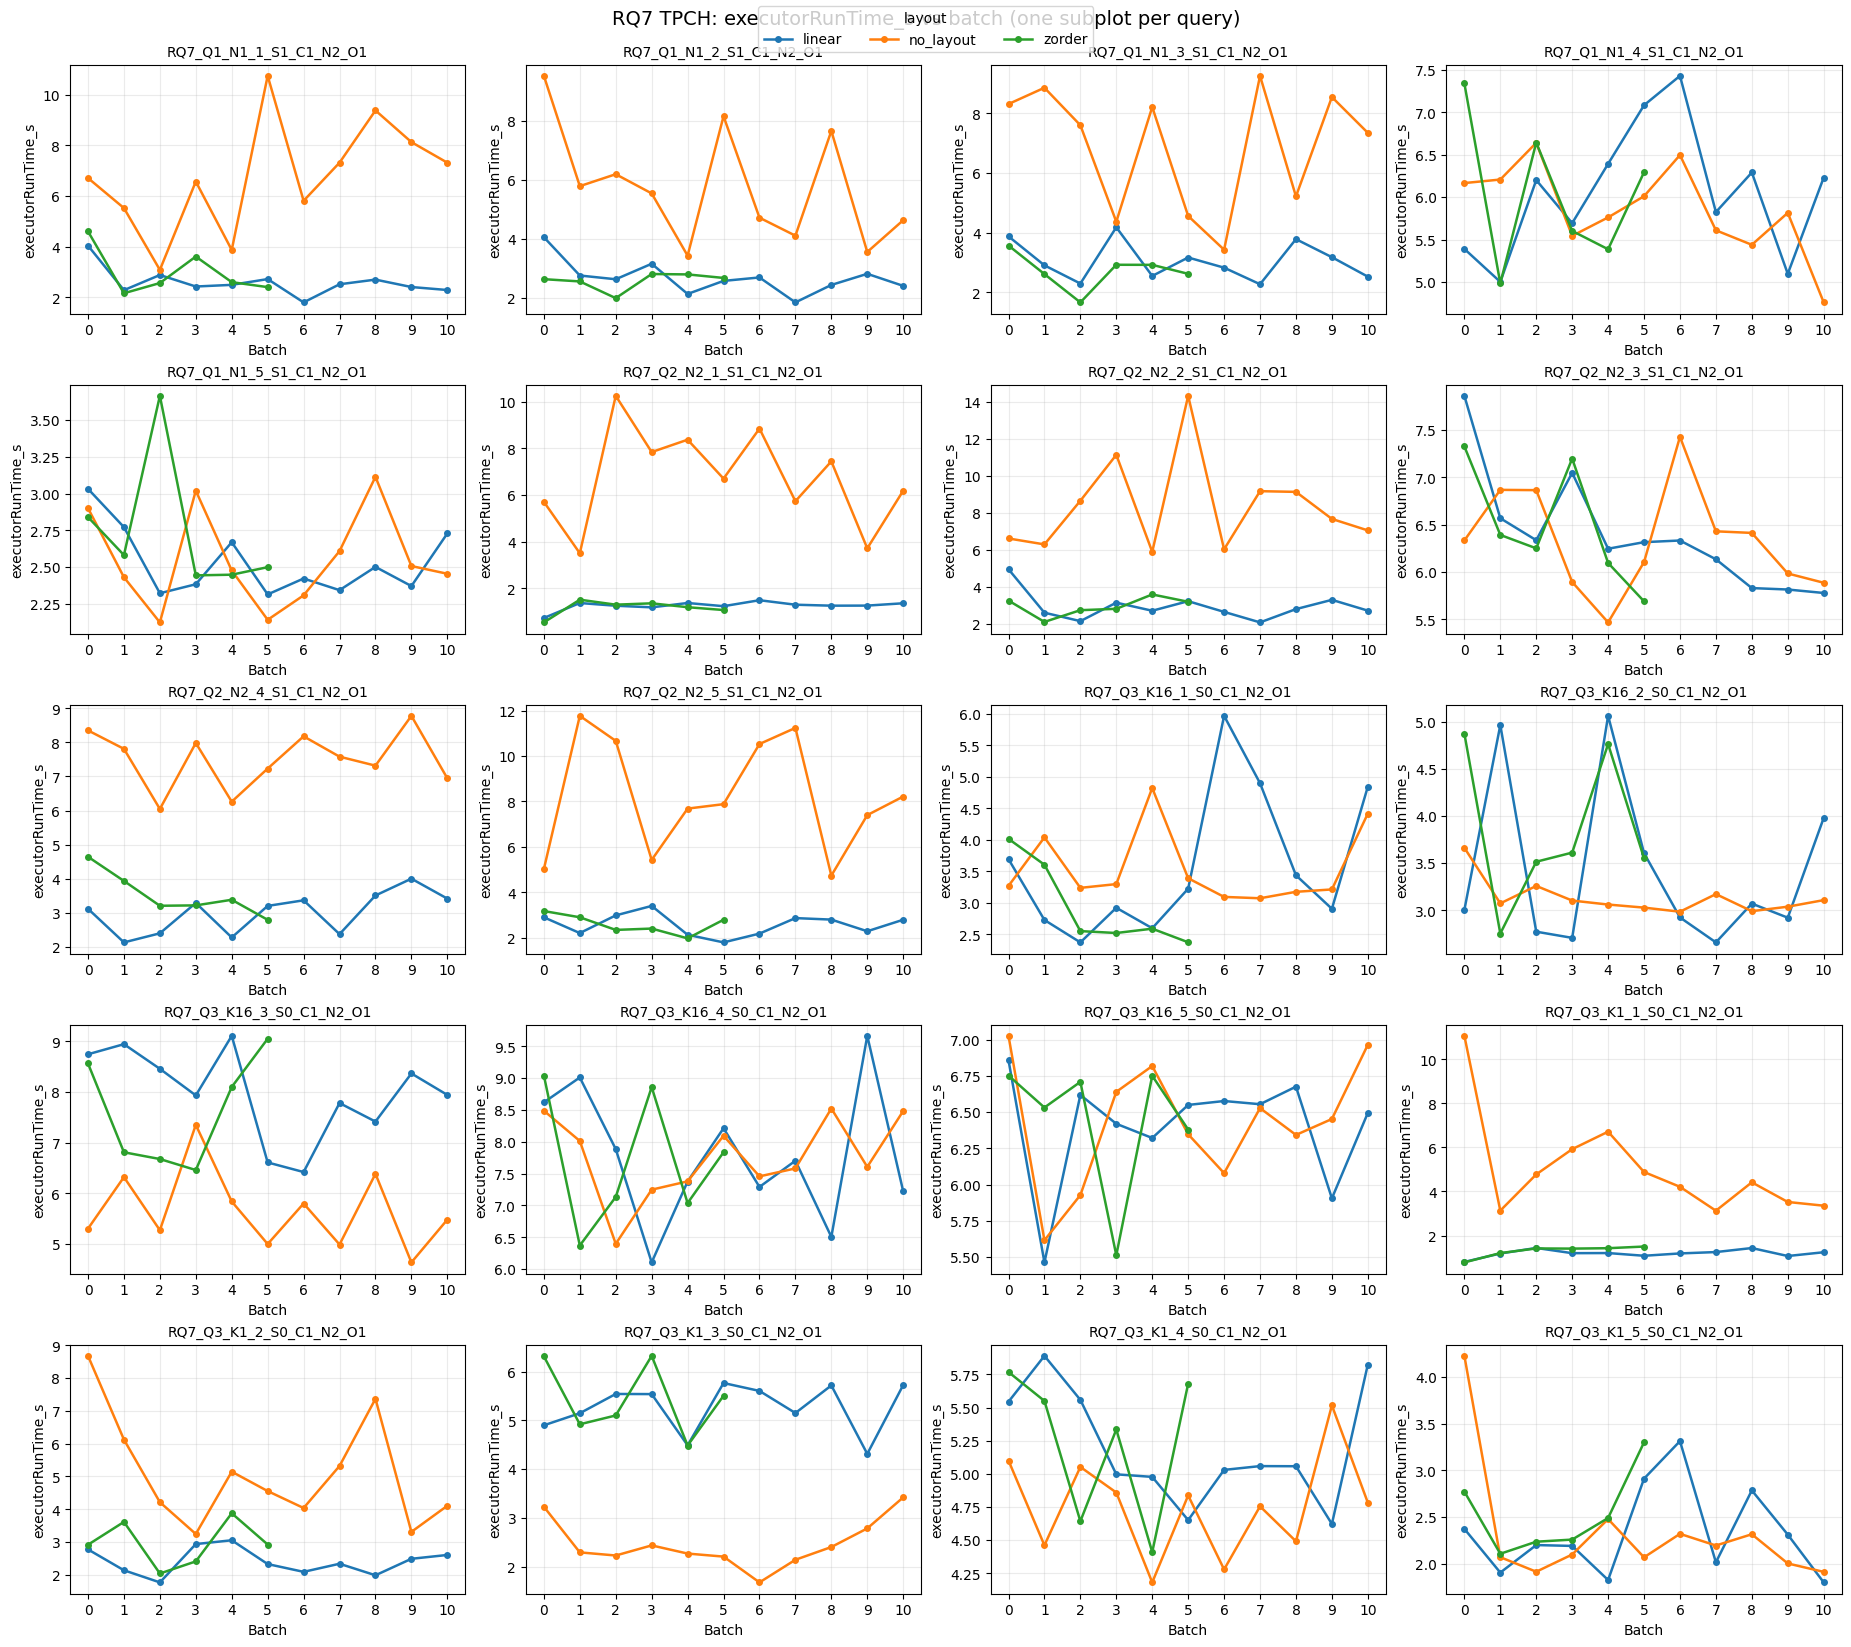


=== executorCpuTime_s ===


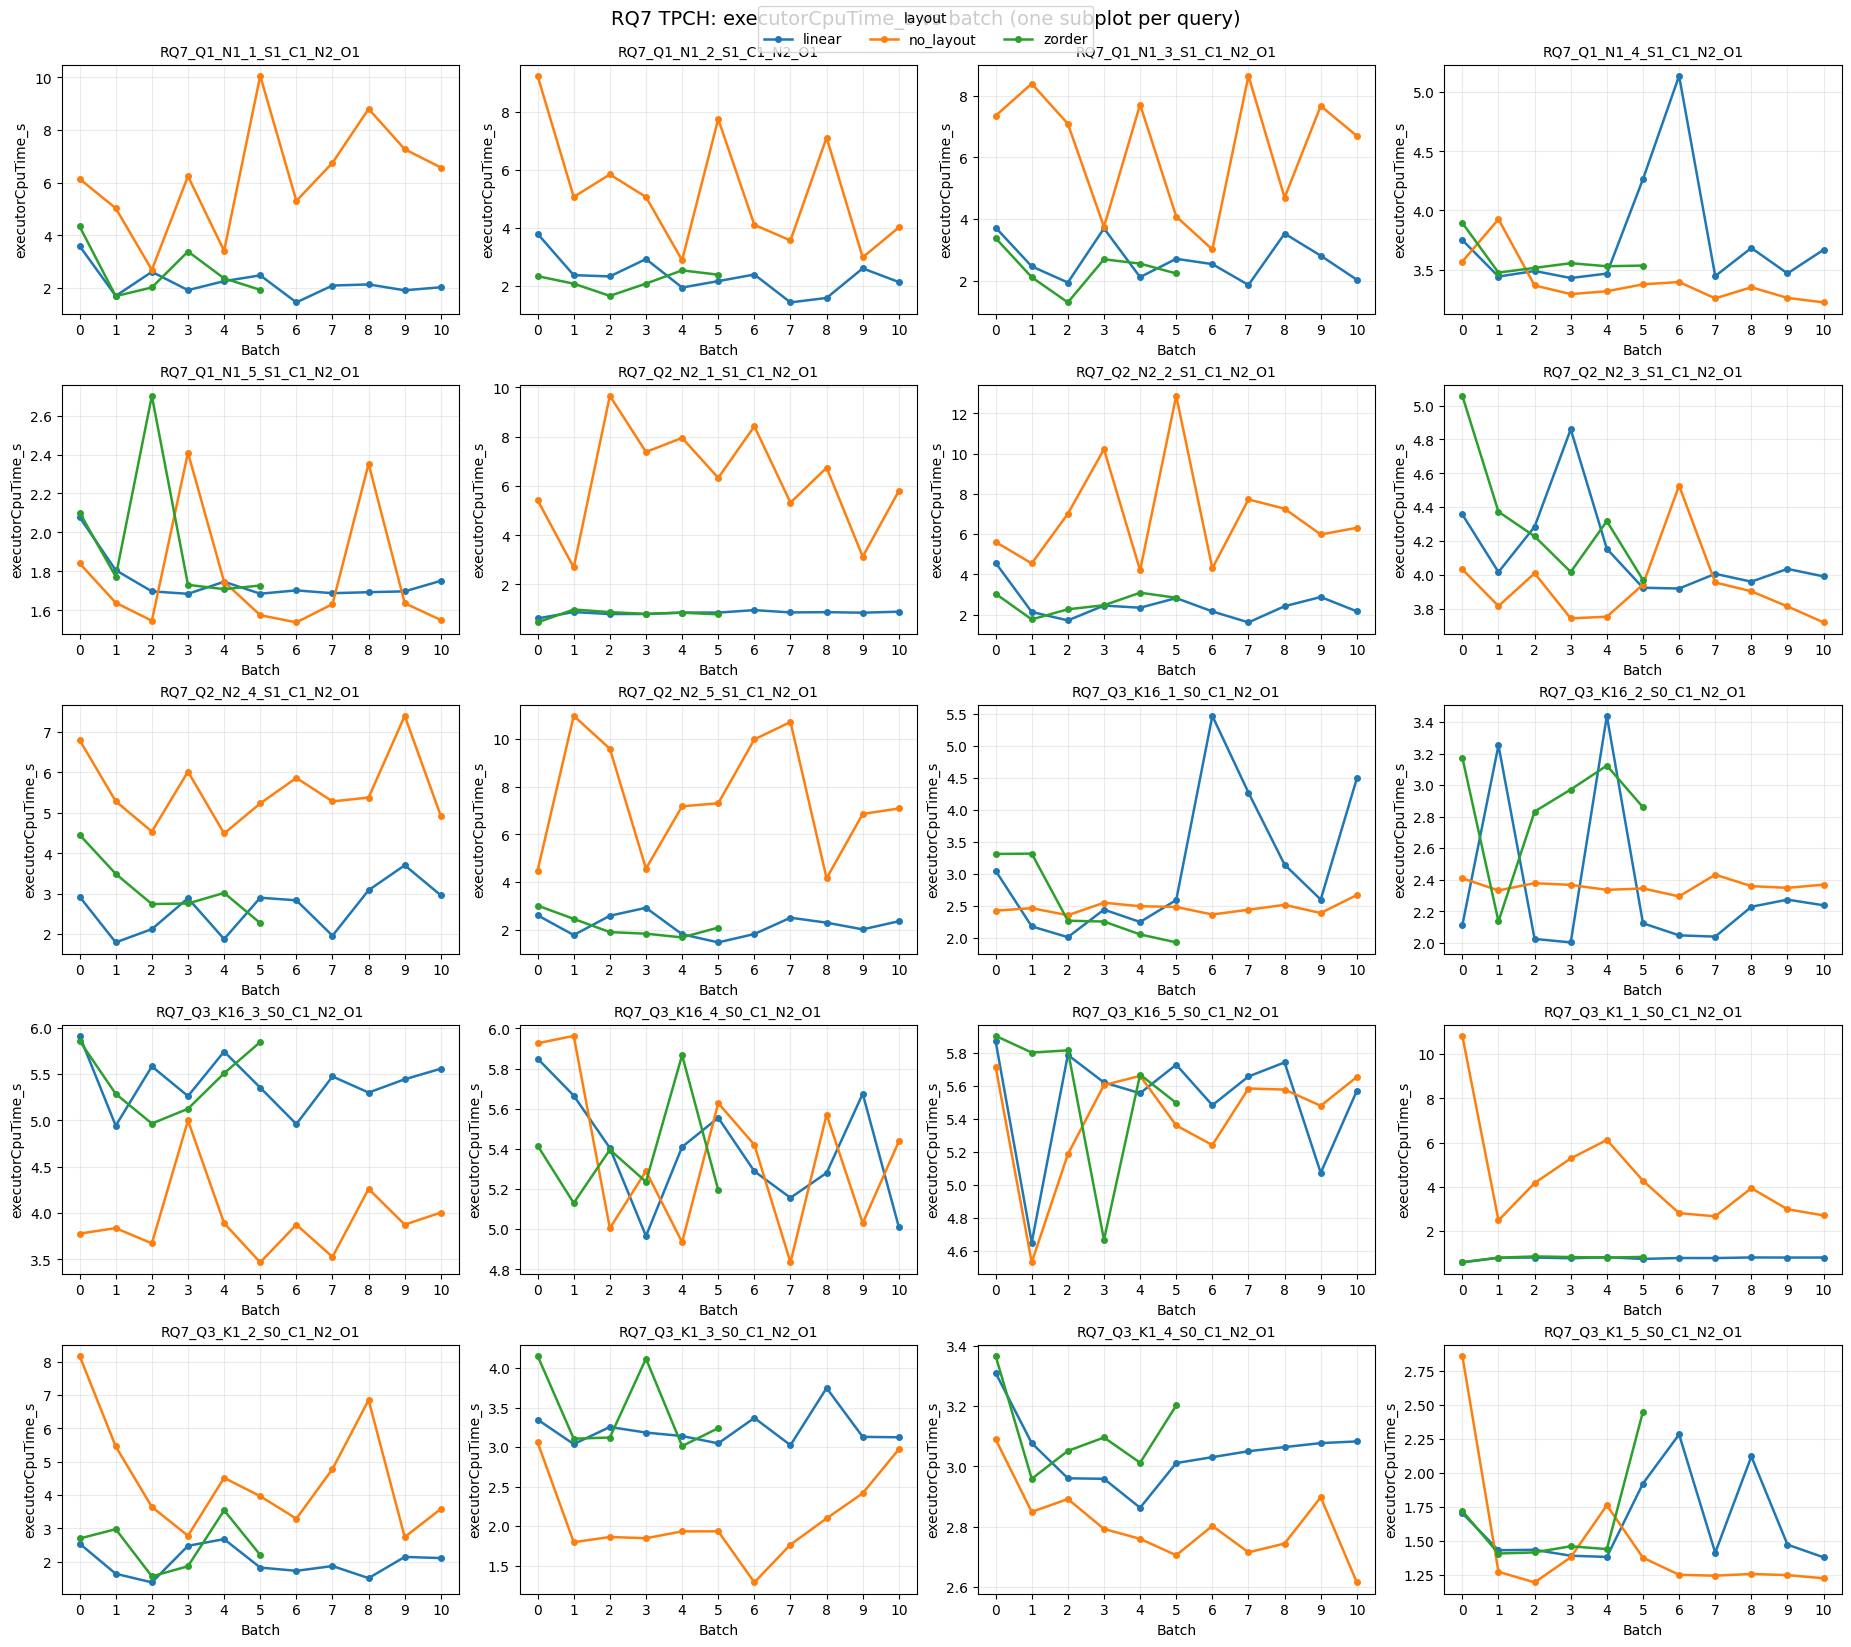

In [9]:
# --- Main figures: one subplot grid per metric (inline, no file output by default) ---
figs = {}
for metric in METRICS:
    print(f"\n=== {metric} ===")
    fig, axes, outputs = plot_rq7_per_query_lines(
        summary_by_metric[metric],
        metric=metric,
        batches=BATCHES,
        save_individual=False,
        save_grid=False,
        close_fig=False,
    )
    figs[metric] = fig
    plt.show()


,spec,layout,batch,metric_mean,metric_std,n_runs
0,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,0,197.1319,66.661654,10
1,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,1,993.0477,118.118486,10
2,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,2,1139.3083,222.533248,10
3,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,3,1022.8254,140.371062,10
4,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,4,1062.6273,176.456109,10
5,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,5,1029.4673,111.747565,10
6,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,6,1000.6870,150.001760,10
7,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,7,1105.1785,204.355116,10
8,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,8,1052.0848,172.520111,10
9,spec_tpch_RQ7_Q1_N1_1_S1_C1_N2_O1,linear,9,1064.0225,182.040254,10


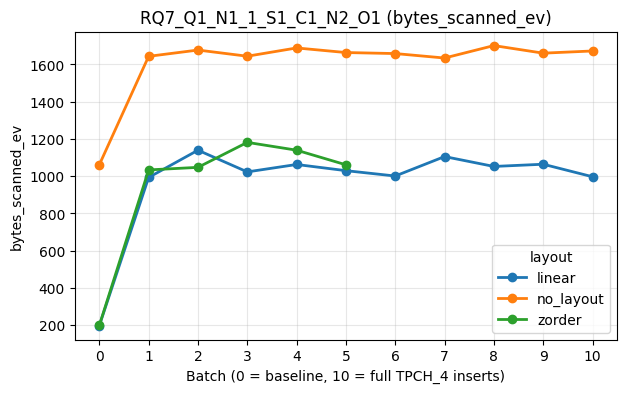

In [10]:
# --- Optional: inspect one query for one metric ---
TARGET_METRIC = METRICS[0]
summary_df = summary_by_metric[TARGET_METRIC]
spec_list = sorted(summary_df['spec'].unique())
target_spec = spec_list[0]  # 改成你想看的 spec
tmp = summary_df[summary_df["spec"] == target_spec].copy()
display(tmp[["spec", "layout", "batch", "metric_mean", "metric_std", "n_runs"]].sort_values(["layout", "batch"]))

plt.figure(figsize=(7, 4))
for layout, g in tmp.groupby("layout"):
    g = g.sort_values("batch")
    plt.plot(g["batch"], g["metric_mean"], marker="o", linewidth=2, label=layout)
plt.xticks(BATCHES)
plt.grid(True, alpha=0.3)
plt.xlabel("Batch (0 = baseline, 10 = full TPCH_4 inserts)")
plt.ylabel(TARGET_METRIC)
plt.title(target_spec.replace("spec_tpch_", "") + f" ({TARGET_METRIC})")
if tmp["layout"].nunique() > 1:
    plt.legend(title="layout")
plt.show()


In [6]:
# --- Optional save (only when you need files) ---
# metric = METRICS[0]
# fig, axes, outputs = plot_rq7_per_query_lines(summary_by_metric[metric], metric=metric, save_grid=True, save_individual=False, close_fig=False)
# outputs
